In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
from sklearn.model_selection import train_test_split

In [2]:
import model.basic_model_lib

In [3]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


In [4]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')

In [5]:

ppallete = 'RdYlGn'#'YlGn_d' #"BuGn_d"
porder = ['MED4',  'MIT9312','MIT0604', 'Natl2A', 'MIT9313']
ppallete = [ '#62A586', '#face6e','#f79934', '#7A9BC8', '#F47681', ]
psizes = [150,120,200,120,350]
pmarkers = ['o', 's', '^', 'D', '*']

# #ffd7a1
    
pedge = 'green'
apallete = "spring"
aorder = ['DE', 'DE1', '1A3', 'ATCC', 'BS11']
amarkers = ['P', 'X', 'h', '<','>']
apallete = ['#6dad36', '#c7e89f', '#f5c4e1', '#d5579d', '#8a0850']

aedge='orange'
epallete = ['#6cf0ba', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']
#sns.diverging_palette(355, 217, s=74, l=50, n=4) #'Paired' # 'BrBG'# "coolwarm"
eorder = ['e1','e3', 'e4', 'e5', 'e6']
#aedge='orange'


In [6]:
PRO_COLOR = 'MediumSeaGreen'
PRO_FL_COLOR = 'DarkGreen'
PRO_FCM_COLOR = 'MediumSpringGreen'

ALT_COLOR = 'Gold'
ALT_FCM_COLOR = 'PaleGoldenrod'
N_COLOR = 'royalblue'
ON_COLOR = 'PowderBlue'
C_COLOR = 'FireBrick'
OC_COLOR = 'LightCoral'

mcolors = {
    'b_n_p' : PRO_COLOR, 
    'b_c_p': PRO_COLOR, 
    'b_n_a': ALT_COLOR , 
    'b_c_a' : ALT_COLOR, 
    'x_p': PRO_COLOR, 
    'x_a': ALT_COLOR, 
    'n' : N_COLOR, 
    'c': C_COLOR, 
    'on': ON_COLOR, 
    'oc':OC_COLOR,
    'q_n_p' :PRO_COLOR, 
    'q_c_p': PRO_COLOR, 
}


In [7]:
from sympy import *

In [8]:
df = pd.read_pickle('CCPA.pkl.gz')
df.loc[df.PRO == 'C9B', 'PRO'] = 'MIT0604'

In [9]:
fl2cell_model, compdf = cp.gen_FL2cells_model()
df['cells'] = cp.compute_FL2cells(df['FL'], fl2cell_model)

                            OLS Regression Results                            
Dep. Variable:                    FCM   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     776.5
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           2.49e-90
Time:                        14:43:14   Log-Likelihood:                -6527.3
No. Observations:                 347   AIC:                         1.306e+04
Df Residuals:                     345   BIC:                         1.307e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.769e+05   3.27e+06     -0.177      0.8

C:\Users\wosnat\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
df.head()

,day,experiment,sample,FL,PRO,ALT,culture,FL_orig,logFL,cumsumFL,cumsumlogFL,zscoreFL,diffFL,difflogFL,diffday,rateFL,ratelogFL,experiment_sample,cells
0,0.000000,e1,1A,0.133,MED4,1A3,Co_Culture,0.133,-2.017406,0.133,-2.017406,-0.588889,NaN,NaN,NaN,NaN,NaN,"e1, 1A",4.105691e+06
1,0.715972,e1,1A,0.159,MED4,1A3,Co_Culture,0.159,-1.838851,0.292,-3.856257,-0.575917,0.026,0.178555,0.715972,0.036314,0.249388,"e1, 1A",5.021082e+06
2,1.925694,e1,1A,0.155,MED4,1A3,Co_Culture,0.155,-1.864330,0.447,-5.720587,-0.577913,-0.004,-0.025479,1.209722,-0.003307,-0.021062,"e1, 1A",4.880252e+06
3,2.831250,e1,1A,0.180,MED4,1A3,Co_Culture,0.180,-1.714798,0.627,-7.435386,-0.565440,0.025,0.149532,0.905556,0.027607,0.165127,"e1, 1A",5.760436e+06
4,6.674306,e1,1A,0.632,MED4,1A3,Co_Culture,0.632,-0.458866,1.259,-7.894252,-0.339936,0.452,1.255933,3.843056,0.117615,0.326806,"e1, 1A",2.167415e+07


In [11]:
fcmdflist=list()
for i in os.listdir('fcmfiles'):
    if i.endswith('.csv'):
        d = pd.read_csv(os.path.join('fcmfiles', i))
        n = os.path.splitext(i)[0]
        _, experiment, day = n.split('_')
        d['experiment'] = experiment
        d['day'] = day.replace('Days','')
        fcmdflist.append(d)
fcmdf = pd.concat(fcmdflist)
fcmdf.loc[fcmdf.PRO == 'C9B', 'PRO'] = 'MIT0604'
fcmdf['day'] = pd.to_numeric(fcmdf['day'])

In [12]:
df1 = df.loc[df.experiment.isin(['e1']) & df.PRO.isin(['MED4']) & df.culture.isin(['Axenic'])]
fcmdf1 = fcmdf.loc[fcmdf.experiment.isin(['exp1']) & 
                   fcmdf.PRO.isin(['MED4']) & 
                  fcmdf.ALT.isna()]

compdf1 = compdf.loc[compdf.MODE.isin(['lowN']) & 
                   compdf.PRO.isin(['MED4']) ]
compdf1.rename(columns={'FCM': 'PRO.1'}, inplace=True)
reffcmdf1 = pd.concat([fcmdf1.loc[:,['day', 'PRO.1']], compdf1.loc[:,['day', 'PRO.1']], ])

C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\core\frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [16]:
import model.basic_model_lib

In [17]:
m = model.basic_model_lib.ModelProALT()

In [18]:
m.print_param_values()

gamma_n_p 0.04
gamma_c_p 0.04
gamma_n_a 0.5
gamma_c_a 0.5
gamma_refractory_n_p 0.1
gamma_refractory_c_p 0.1
gamma_refractory_n_a 0.1
gamma_refractory_c_a 0.1
excretion_n_p 0.01
excretion_c_p 0.01
excretion_n_a 0.01
excretion_c_a 0.01
v_n_max_p 1.9e-09
v_c_max_p 8e-09
v_in_max_a 1.4582177199759883e-09
v_n_max_a 1.4582177199759882e-08
v_c_max_a 6.139864084109425e-08
mu_inf_p 0.86
mu_inf_a 5.16
k_n_p 0.11008885160313818
k_c_p 0.11008885160313818
k_n_a 0.2502723352076287
k_in_a 0.02502723352076287
k_c_a 0.2502723352076287
q_n_min_p 7e-10
q_c_min_p 3e-11
q_n_min_a 1.4658725248598342e-08
q_c_min_a 6.282310820827862e-10
q_n_max_p 1.5e-09
q_c_max_p 6e-09
q_n_max_a 3.1411554104139307e-08
q_c_max_a 1.2564621641655723e-07
mortality_p 0.1
mortality_a 0.1
r0_p 0.18
r0_a 0.18
b_p 0.01
b_a 0.01
delta_t 1.1574074074074073e-05


In [19]:
m = model.basic_model_lib.ModelProALT()
m.disable_organism('ALT')
m.override_initial_values({
    'b_n_a': 0,
    'b_c_a': 0,
    'x_a': 0,
})
#m.override_param_values({i : k for i, k in zip(param_names, param_values)})
reference_days = reffcmdf1['day'].unique().tolist()
#max_day = int(ref_df['day'].max()) + 1
max_day = 140
m.set_referece_times(reference_days)
res, ref_res = m.simulate(num_iterations=max_day*3600*24, collect_every=3600*6)


.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [20]:
res[0]

{'b_n_p': 0.7,
 'b_c_p': 0.03,
 'b_n_a': 0.0,
 'b_c_a': 0.0,
 'x_p': 1000000000.0,
 'x_a': 0,
 'n': 100,
 'c': 2000,
 'on': 20,
 'oc': 60,
 'on_refractory': 0,
 'oc_refractory': 0,
 'day': 0.0}

In [21]:
res_df = pd.DataFrame(res)

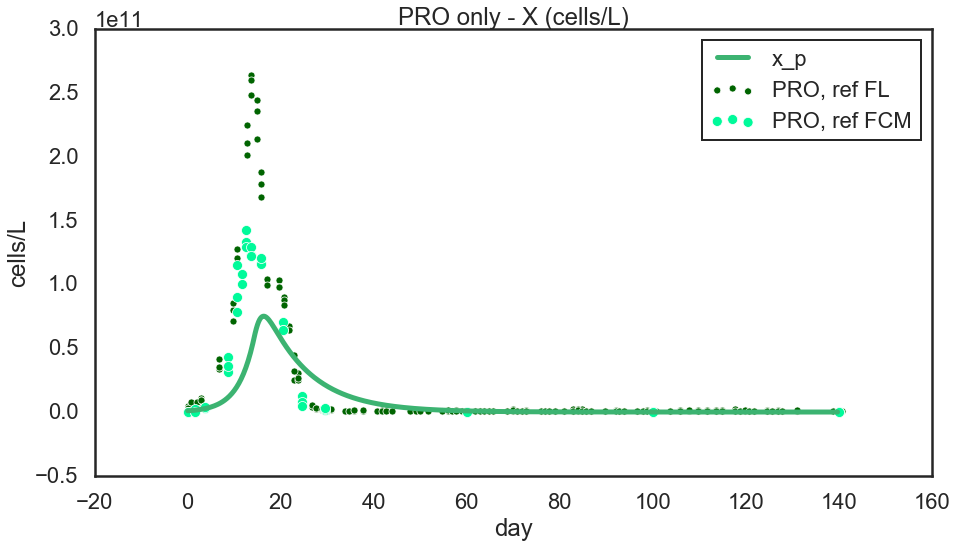

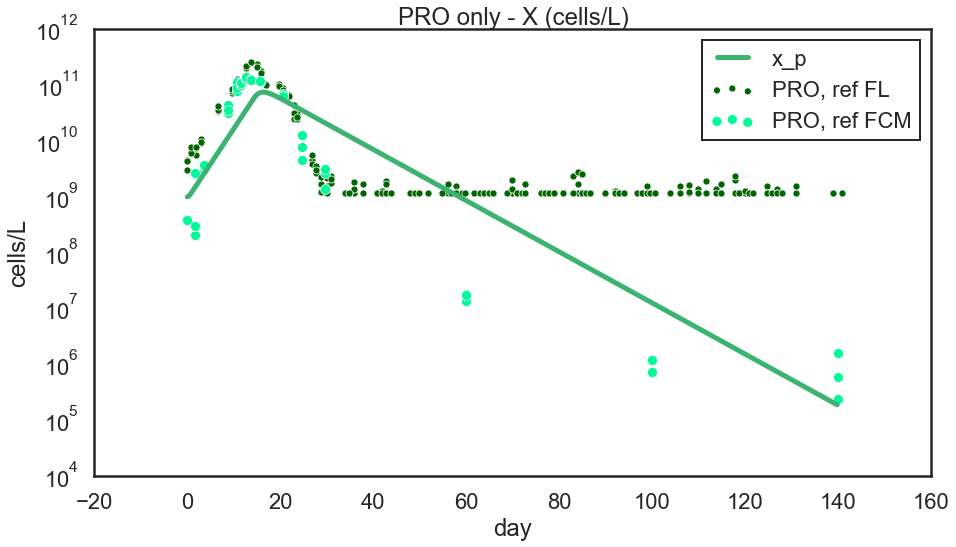

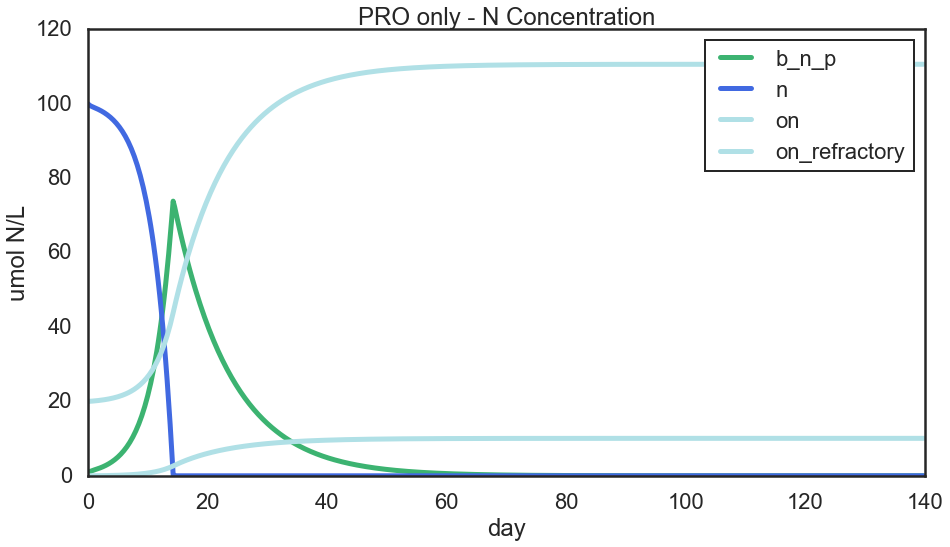

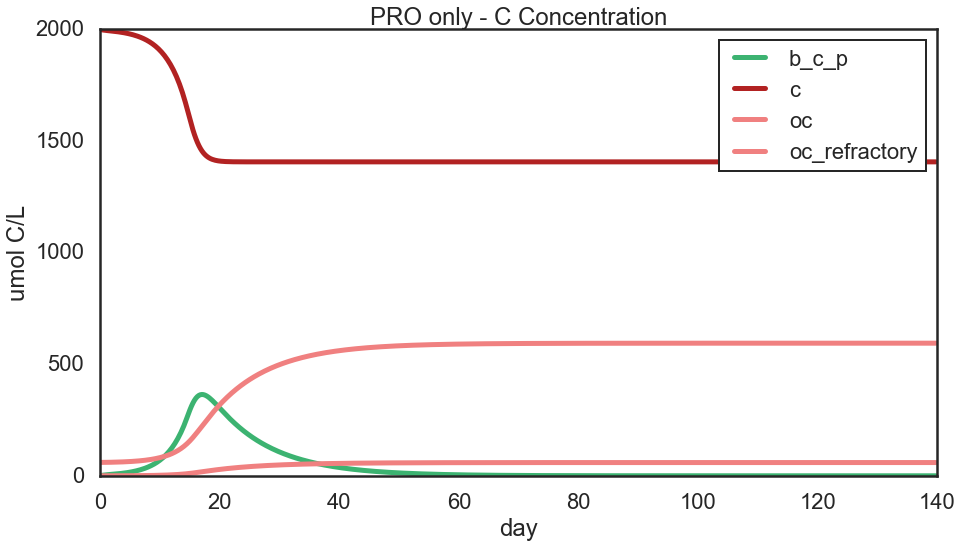

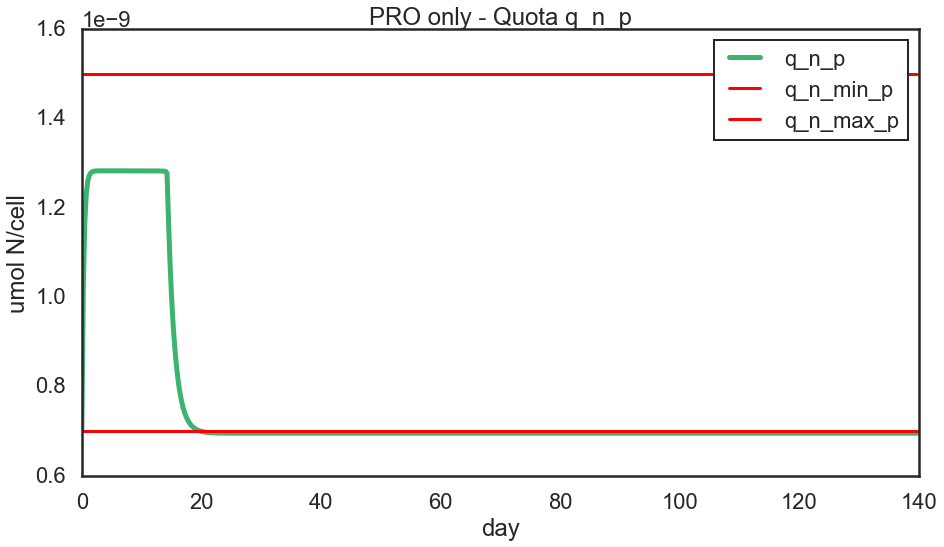

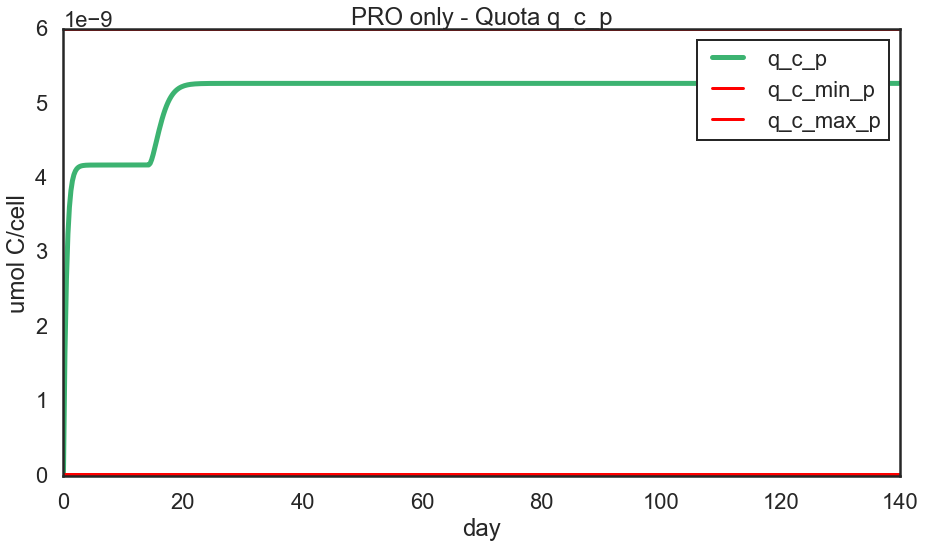

In [22]:
df1 = df.loc[df.experiment.isin(['e1']) & df.PRO.isin(['MED4']) & df.culture.isin(['Axenic'])]
fcmdf1 = fcmdf.loc[fcmdf.experiment.isin(['exp1']) & 
                   fcmdf.PRO.isin(['MED4']) & 
                  fcmdf.ALT.isna()]

compdf1 = compdf.loc[compdf.MODE.isin(['lowN']) & 
                   compdf.PRO.isin(['MED4']) ]
compdf1.rename(columns={'FCM': 'PRO.1'}, inplace=True)
reffcmdf1 = pd.concat([fcmdf1.loc[:,['day', 'PRO.1']], compdf1.loc[:,['day', 'PRO.1']], ])


model.basic_model_lib.display_simulation_results(
    res_df, m, 'PRO only', 
    reference_FL_df=df1, reference_FCM_df=reffcmdf1,
    pro_only=True)

In [43]:
m = model.basic_model_lib.ModelProALT()
m.disable_organism('ALT')
m.disable_nutrient('c')
#m.override_param_values({'q_c_min_p' : 1e-20})
m.override_initial_values({
#    'b_n_a': 0,
#    'b_c_a': 0,
#    'b_c_p': 0,
    'x_a': 0,
})

#m.override_param_values({i : k for i, k in zip(param_names, param_values)})
reference_days = reffcmdf1['day'].unique().tolist()
#max_day = int(ref_df['day'].max()) + 1
max_day = 140
m.set_referece_times(reference_days)
res_noc, ref_res_noc = m.simulate(num_iterations=max_day*3600*24, collect_every=3600*6)


.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [44]:
res_noc[0]

{'b_n_p': 0.7,
 'b_c_p': 0.03,
 'b_n_a': 0.0,
 'b_c_a': 0.0,
 'x_p': 1000000000.0,
 'x_a': 0,
 'n': 100,
 'c': 2000,
 'on': 20,
 'oc': 60,
 'on_refractory': 0,
 'oc_refractory': 0,
 'day': 0.0}

In [45]:
res_noc_df = pd.DataFrame(res_noc)

C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\core\frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


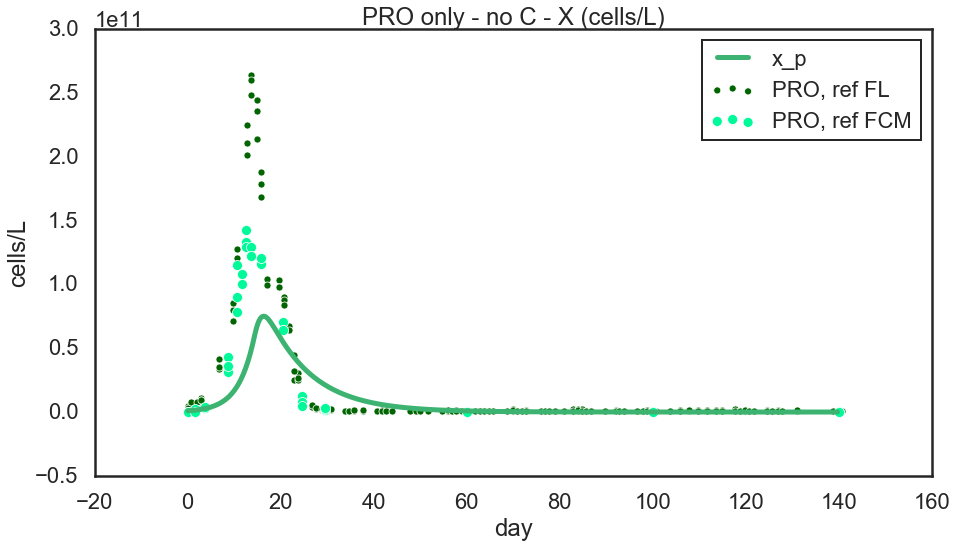

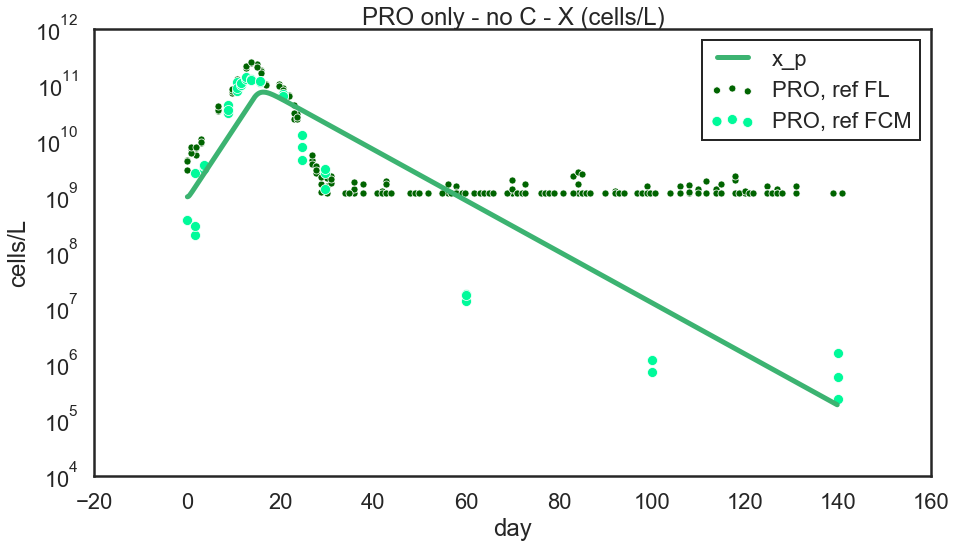

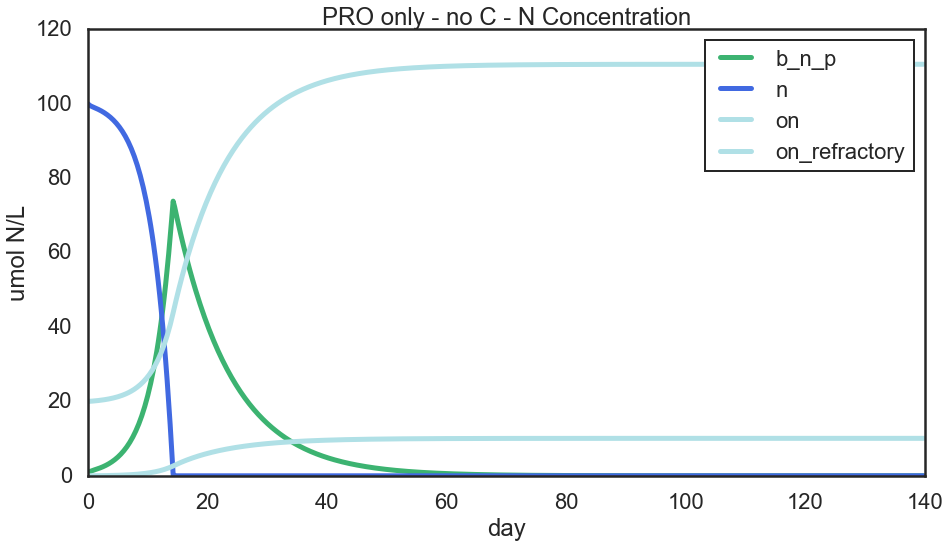

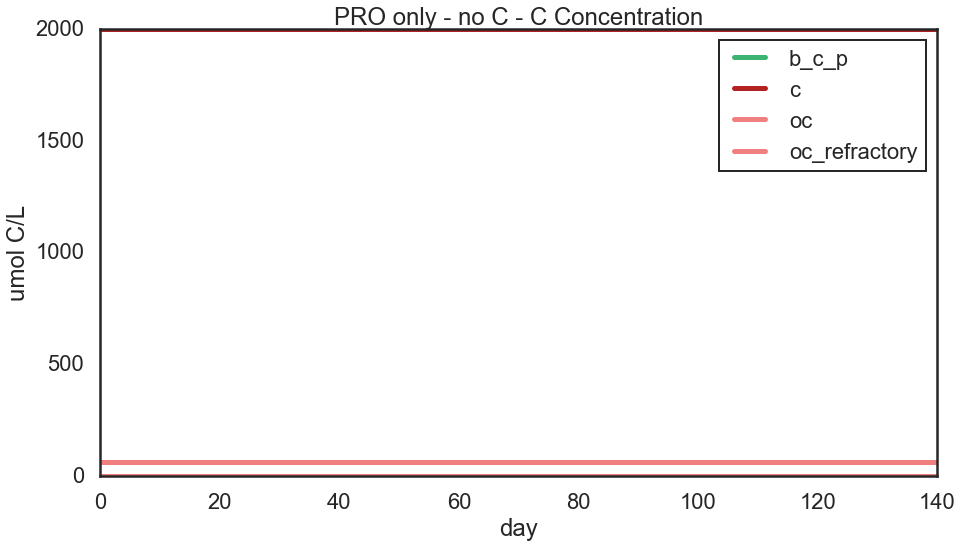

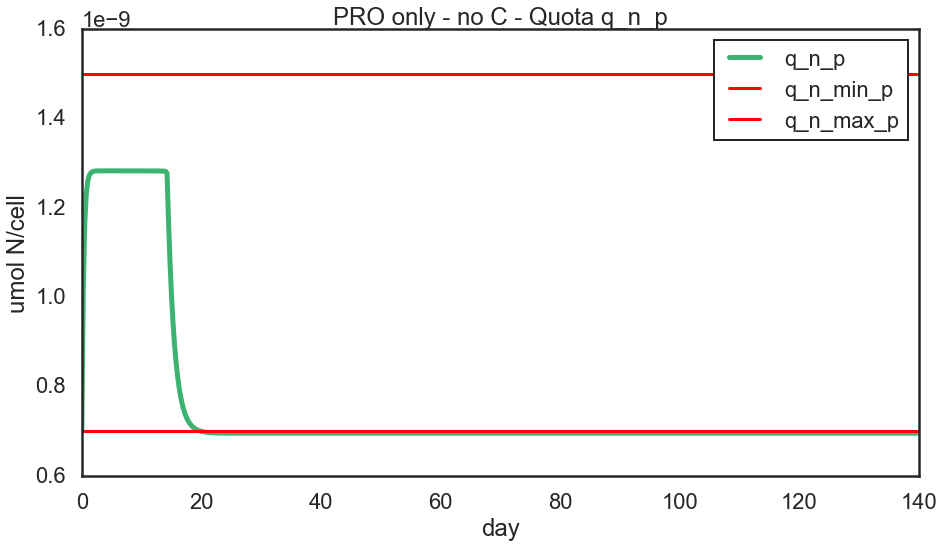

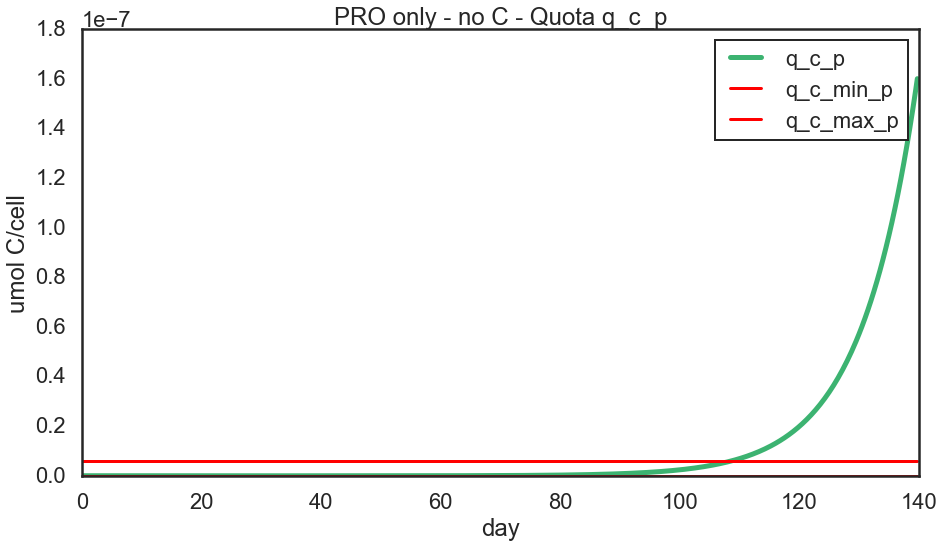

In [46]:
df1 = df.loc[df.experiment.isin(['e1']) & df.PRO.isin(['MED4']) & df.culture.isin(['Axenic'])]
fcmdf1 = fcmdf.loc[fcmdf.experiment.isin(['exp1']) & 
                   fcmdf.PRO.isin(['MED4']) & 
                  fcmdf.ALT.isna()]

compdf1 = compdf.loc[compdf.MODE.isin(['lowN']) & 
                   compdf.PRO.isin(['MED4']) ]
compdf1.rename(columns={'FCM': 'PRO.1'}, inplace=True)
reffcmdf1 = pd.concat([fcmdf1.loc[:,['day', 'PRO.1']], compdf1.loc[:,['day', 'PRO.1']], ])


model.basic_model_lib.display_simulation_results(
    res_noc_df, m, 'PRO only - no C', 
    reference_FL_df=df1, reference_FCM_df=reffcmdf1,
    pro_only=True)

In [49]:
m = model.basic_model_lib.ModelProALT()
#m.disable_organism('ALT')
m.disable_nutrient('c')
#m.override_param_values({'q_c_min_p' : 1e-20})
#m.override_initial_values({
#    'b_n_a': 0,
#    'b_c_a': 0,
#    'b_c_p': 0,
#    'x_a': 0,
#})

#m.override_param_values({i : k for i, k in zip(param_names, param_values)})
reference_days = reffcmdf1['day'].unique().tolist()
#max_day = int(ref_df['day'].max()) + 1
max_day = 140
m.set_referece_times(reference_days)
res_noc, ref_res_noc = m.simulate(num_iterations=max_day*3600*24, collect_every=3600*6)


.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [50]:
res_noc[0]

{'b_n_p': 0.7,
 'b_c_p': 0.03,
 'b_n_a': 146.5872524859834,
 'b_c_a': 6.2823108208278615,
 'x_p': 1000000000.0,
 'x_a': 10000000000.0,
 'n': 100,
 'c': 2000,
 'on': 20,
 'oc': 60,
 'on_refractory': 0,
 'oc_refractory': 0,
 'day': 0.0}

In [51]:
res_noc_df = pd.DataFrame(res_noc)

C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\core\frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\Users\wosnat\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


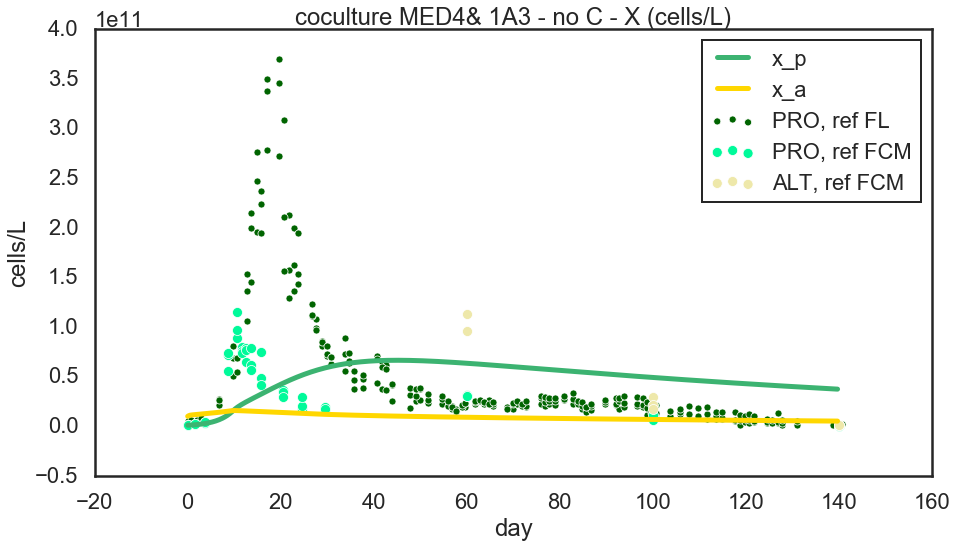

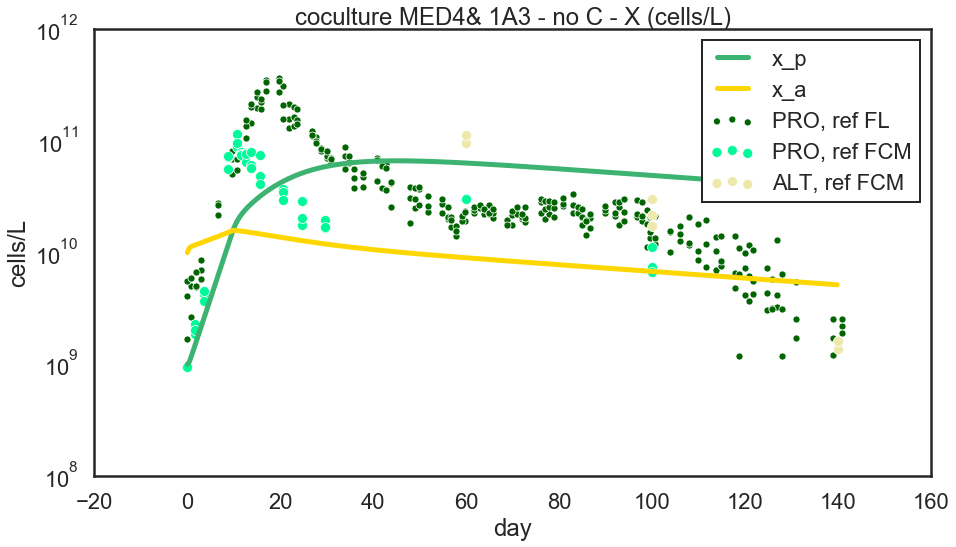

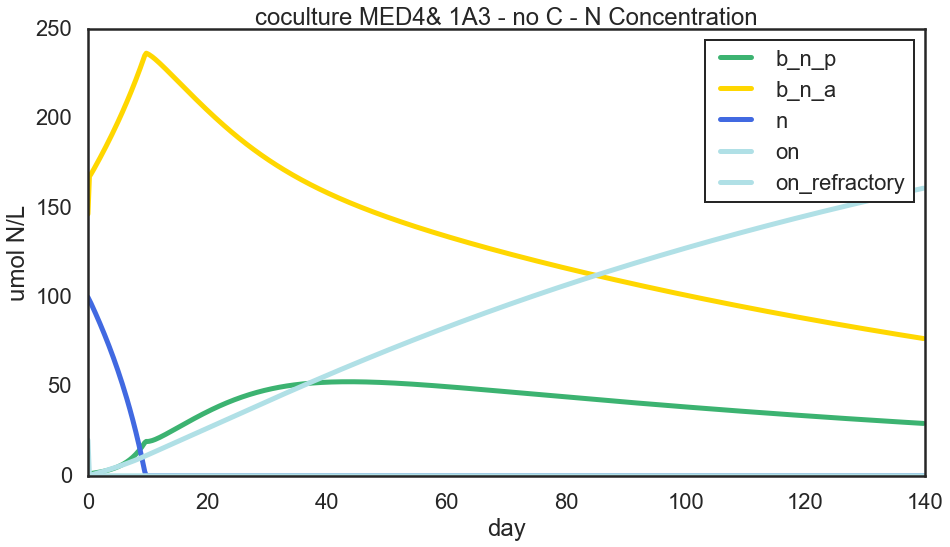

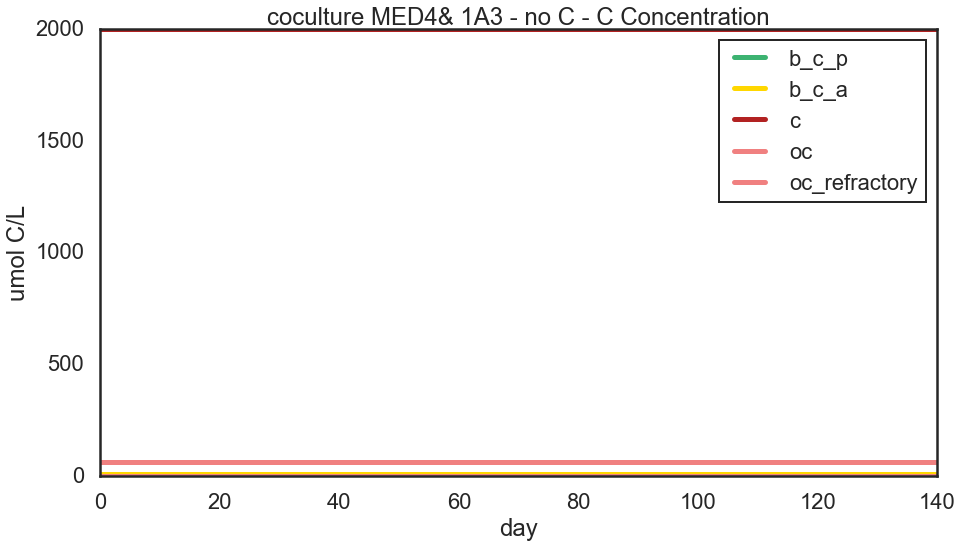

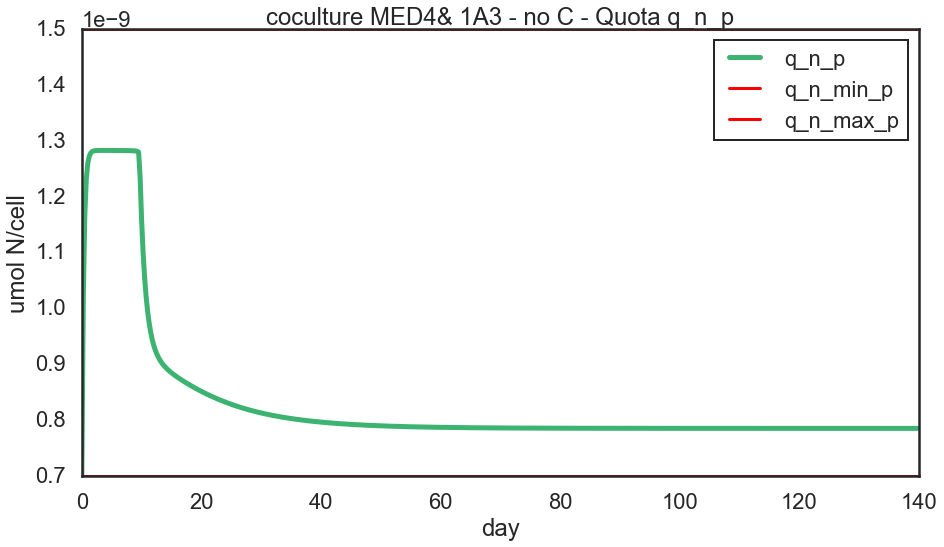

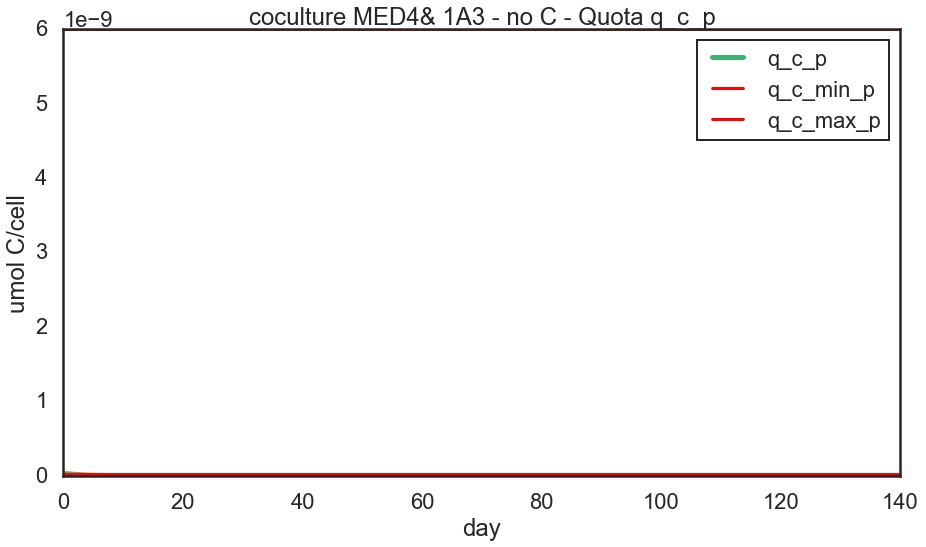

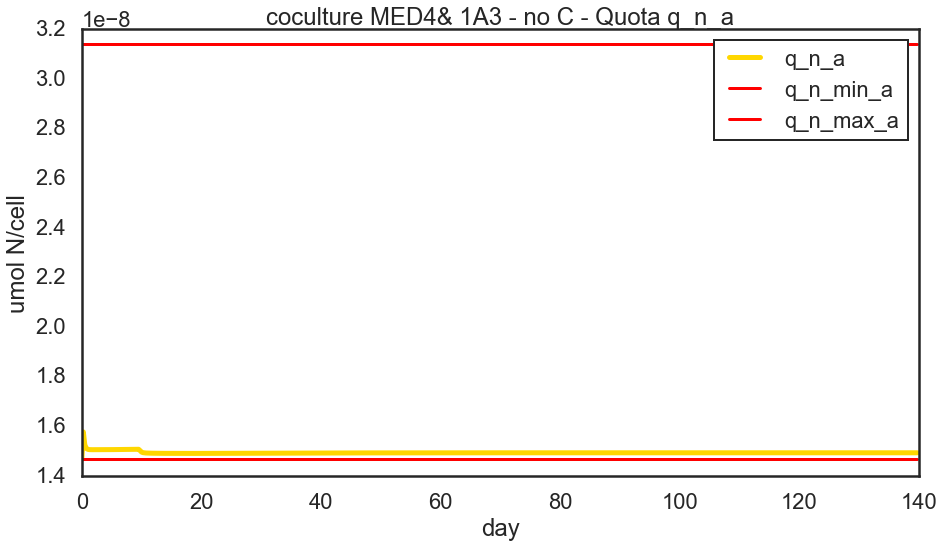

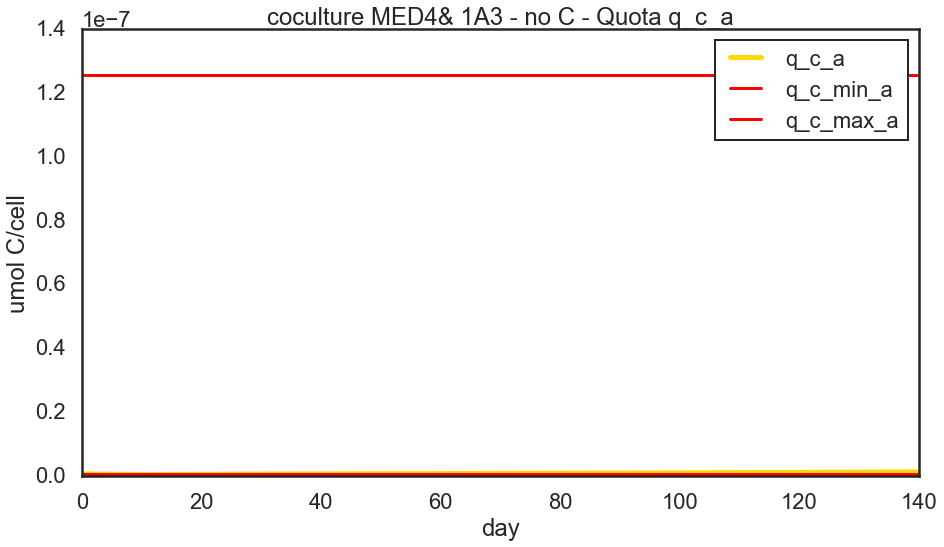

In [52]:
df1 = df.loc[df.experiment.isin(['e1']) & df.PRO.isin(['MED4']) & df.ALT.isin(['1A3'])]
fcmdf1 = fcmdf.loc[fcmdf.experiment.isin(['exp1']) & 
                   fcmdf.PRO.isin(['MED4']) & 
                  fcmdf.ALT.isin(['1A3'])]

compdf1 = compdf.loc[compdf.MODE.isin(['1A3']) & 
                   compdf.PRO.isin(['MED4']) ]
compdf1.rename(columns={'FCM': 'PRO.1'}, inplace=True)
reffcmdf1 = pd.concat([fcmdf1.loc[:,['day', 'PRO.1', 'ALT.1']], compdf1.loc[:,['day', 'PRO.1']], ])


model.basic_model_lib.display_simulation_results(
    res_noc_df, m, 'coculture MED4& 1A3 - no C', 
    reference_FL_df=df1, reference_FCM_df=reffcmdf1)

In [23]:
res_df.loc[res_df.oc <0].head()

,b_n_p,b_c_p,b_n_a,b_c_a,x_p,x_a,n,c,on,oc,on_refractory,oc_refractory,day,q_n_p,q_c_p


In [24]:
res_df.loc[res_df.n <0].head()

,b_n_p,b_c_p,b_n_a,b_c_a,x_p,x_a,n,c,on,oc,on_refractory,oc_refractory,day,q_n_p,q_c_p


In [21]:
res_df.tail()

,b_n_p,b_c_p,b_n_a,b_c_a,x_p,x_a,n,c,on,oc,on_refractory,oc_refractory,day,q_n_p,q_c_p
555,0.000138,0.001044,0.0,0.0,197930.488978,0,0.00016,1406.62281,110.629732,594.065531,10.069970,59.340615,138.75,6.951501e-10,5.275764e-09
556,0.000134,0.001017,0.0,0.0,192754.216373,0,0.00016,1406.62281,110.629735,594.065556,10.069971,59.340617,139.00,6.951501e-10,5.275764e-09
557,0.000130,0.000990,0.0,0.0,187713.313505,0,0.00016,1406.62281,110.629738,594.065580,10.069971,59.340620,139.25,6.951501e-10,5.275764e-09
558,0.000127,0.000964,0.0,0.0,182804.240188,0,0.00016,1406.62281,110.629741,594.065603,10.069971,59.340623,139.50,6.951501e-10,5.275764e-09
559,0.000124,0.000939,0.0,0.0,178023.548819,0,0.00016,1406.62281,110.629744,594.065626,10.069972,59.340625,139.75,6.951501e-10,5.275764e-09


In [ ]:
param_values = [1.9e-09, 0.86, 0.11, #7e-10,1.5e-09
               ]
param_names = [
'v_n_max_p',
'mu_inf_p', 
'k_n_p' ,
#'q_n_min_p' ,
#'q_n_max_p' ,
]

from scipy.optimize import differential_evolution
ref_df = reffcmdf1
ref_df.rename(columns={'PRO.1': 'VALUE'}, inplace=True)
print(ref_df.head())
opt_func = lambda x : model.basic_model_lib.model_optimize_PRO(x, ref_df, param_names)
def compute_bounds(i):
    if i < 0.1:
        return (i/10, i*10)
        #return (0, 0.2)
    else:
        return (i/10, i*2)
    
bounds = [compute_bounds(i) for i in param_values]
result = differential_evolution(opt_func, bounds, disp=True)

0     day        VALUE
87  100.0   710.900474
88  100.0  1184.834123
89  100.0  1184.834123
87  140.0   580.000000
88  140.0   240.000000
.56.678101977944145
.53.77379503846303
.52.52195855854729
.55.57924051420074
.54.33640906601929
.53.18960879198702
.63.05342130891367
.34.651726458033465
.55.029593436305916
.54.785209760290414
.58.82674424687476
.55.70316490754357
.56.00527513480121
.56.767269232138176
.56.794607899278226
.56.47830301550846
.54.041831419731224
.56.27601770859595
.56.94885470218652
.55.468296191685155
.57.14996144962465
.56.86842171041915
.56.59724888760086
.52.98590103484127
.52.69293646968021
.52.567914288875194
.56.89943756976043
.56.17746620330966
.59.05964364690996
.55.24695296785668
.55.26812587700796
.55.53098535247509
.56.10262047027077
.41.25198676361174
.54.58606916262049
.55.396091631133494
.56.21536490327334
.54.12876958310726
.52.685329655624315
.52.49620156238418
.56.32614922710059
.70.41959596825109
.55.77583164002796
.53.44529429161887
.57.34896990995